# Дескриптор области.
Дескрипотор будет описываться так:
Пусть  $k=3$.
Для граничных точек посчитаем количество соседних граничных точек на расстоянии не более $k$ по любой из координат.
<img src="vectors.jpg">
Всё это суммируется для каждого смещения и нормируется по площади.

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import numpy as np
import skimage
#from skimage import filters, morphology, measure
from tqdm import tqdm_notebook
import seaborn as sns

Откроем исходное изображение и достанем оттуда границы.

In [2]:
img = cv2.imread('image2.png', 0)

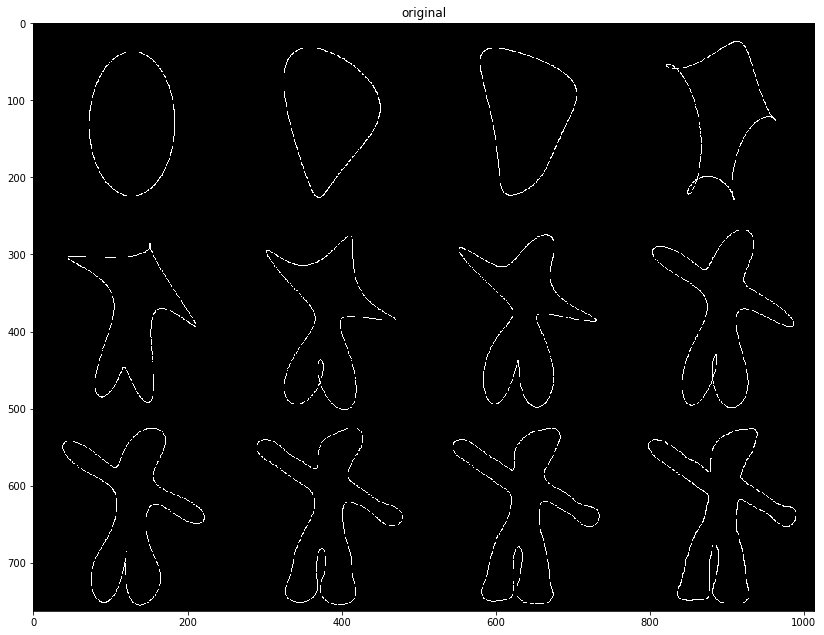

In [3]:
plt.figure(figsize=(14,20))
plt.imshow(img, 'gray')
plt.title('original')
plt.show()

In [4]:
def descriptor(img, k=2):
    l = 2*k+1
    a = np.zeros((l,l))
    thresh = (np.max(img)+np.min(img))//2
    h = len(img)
    w = len(img[0])
    #w, h = img.width, img. height
    
    for i in range(w):
        for j in range(h):
            if img[i][j] < thresh:
                continue
            for dy in range(-k, k+1):
                if not(0 <= i+dy < h):
                    continue
                for dx in range(-k, k+1):
                    if not(0 <= j+dx < w):
                        continue
                    a[k+dy][k+dx] += img[i+dy][j+dx]
    
    return a/a[k][k]

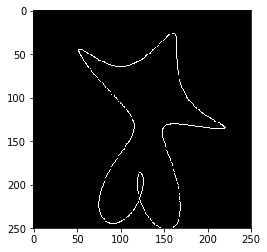

In [5]:
roi = img[250:500,250:500]
plt.imshow(roi, 'gray'); plt.show()

HBox(children=(IntProgress(value=0, max=12), HTML(value='')))

image number 0 [[ 0.10795455  0.21022727  0.3219697   0.21780303  0.12121212]
 [ 0.09469697  0.23106061  0.57954545  0.24810606  0.10037879]
 [ 0.08522727  0.29166667  1.          0.29166667  0.08522727]
 [ 0.10037879  0.24810606  0.57954545  0.23106061  0.09469697]
 [ 0.12121212  0.21780303  0.3219697   0.21022727  0.10795455]]
image number 1 [[ 0.113879    0.25088968  0.25622776  0.23131673  0.1975089 ]
 [ 0.12455516  0.27402135  0.55516014  0.28469751  0.0747331 ]
 [ 0.0747331   0.30960854  1.          0.30960854  0.0747331 ]
 [ 0.0747331   0.28469751  0.55516014  0.27402135  0.12455516]
 [ 0.1975089   0.23131673  0.25622776  0.25088968  0.113879  ]]
image number 2 [[ 0.07092199  0.16843972  0.30496454  0.23758865  0.09751773]
 [ 0.16666667  0.2251773   0.55319149  0.2251773   0.08333333]
 [ 0.12234043  0.32269504  1.          0.32269504  0.12234043]
 [ 0.08333333  0.2251773   0.55319149  0.2251773   0.16666667]
 [ 0.09751773  0.23758865  0.30496454  0.16843972  0.07092199]]
image n

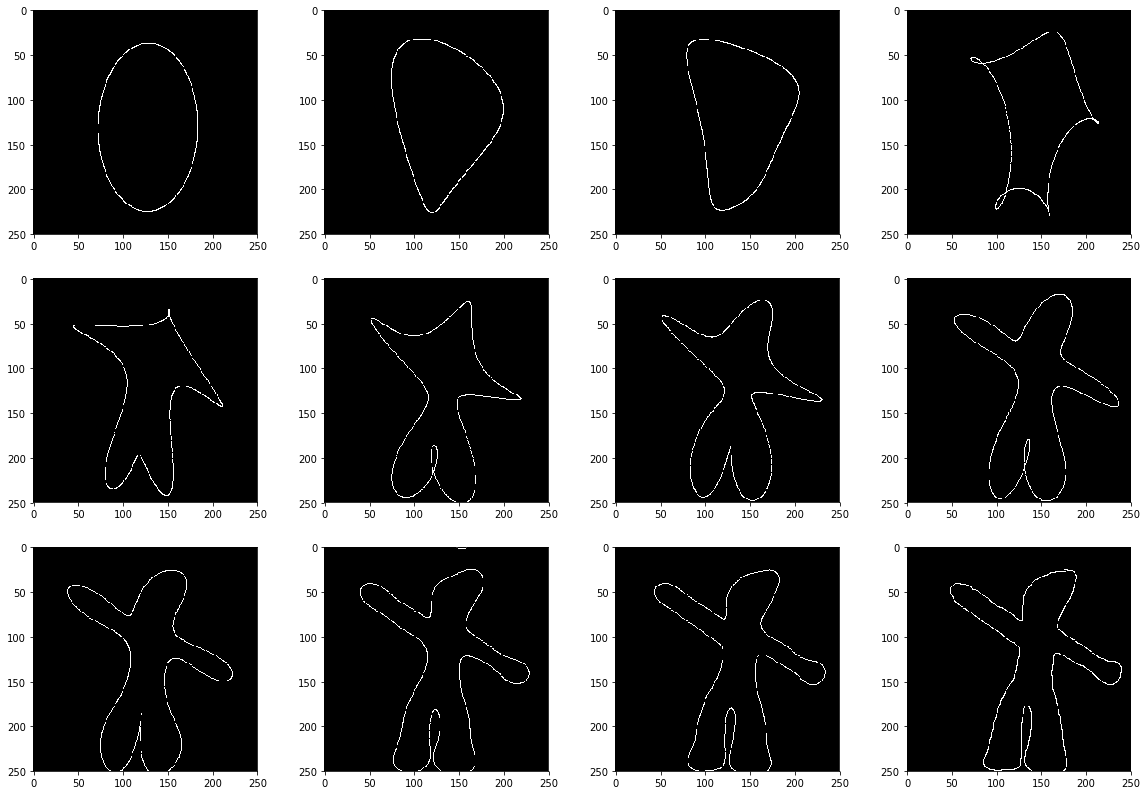

In [6]:
plt.figure(figsize=(20, 14))
dx = dy = 250

d = [0]*12
for number in tqdm_notebook(range(3*4)):
    i = number // 4
    j = number % 4
    
    roi = img[dx*i:dx*(i+1), dy*j:dy*(j+1)]
    plt.subplot(3,4,i*4+j+1)
    plt.imshow(roi, 'gray')
    
    dsc = descriptor(roi)
    print("image number", number, dsc)
    d[number] = dsc

In [7]:
def distance(a,b):
    return np.linalg.norm(a-b)

In [8]:
def plot_distance_matrix(distances, title=''):
    n = len(distances)
    dd = [[distance(distances[i], distances[j]) for j in range(n)] for i in range(n)]
    f, ax = plt.subplots(figsize=(10, 8))

    sns.heatmap(dd, mask=np.zeros_like(dd, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
        square=True, ax=ax)
    plt.title(title)
    plt.show()

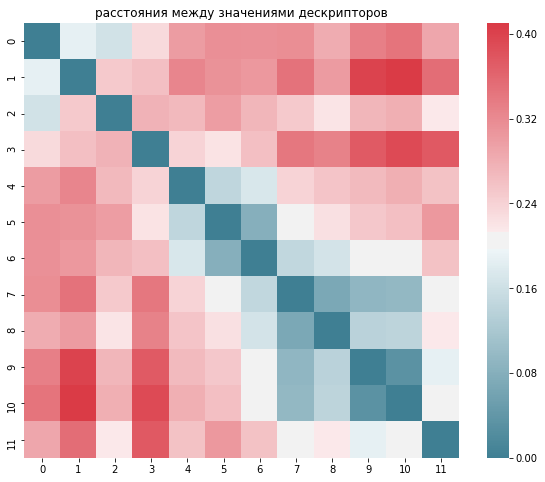

In [9]:
plot_distance_matrix(d, 'расстояния между значениями дескрипторов')

Рассмотрим нвариантность:
* К повороту
* К выбору начальной точки
* К масштабированию
* К сдвигу

По построению должно быть, что:
* к повороту -- не инвариантен
* к выбору начальной точки -- инвариантен, начальной точки просто нет
* к масштабированию -- неинвариантен 
* к сдвигу -- инвариантен, сдвига нет

Что-же проверим гипотезы для поворота и масштабирования

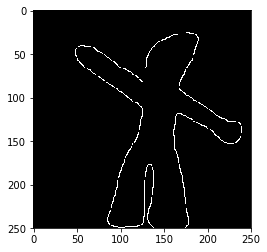

In [10]:
# Рассмотрим на примере последней картинки:
roi = img[500:750, 750:1000]
plt.imshow(roi, 'gray'); plt.show()

### Поворот:

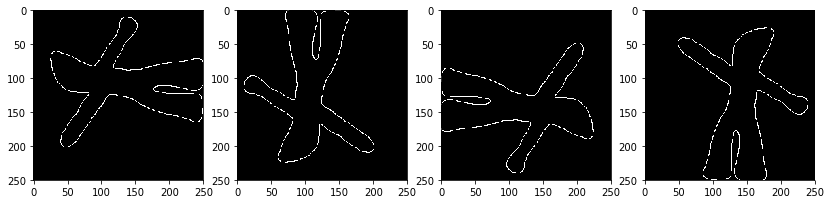

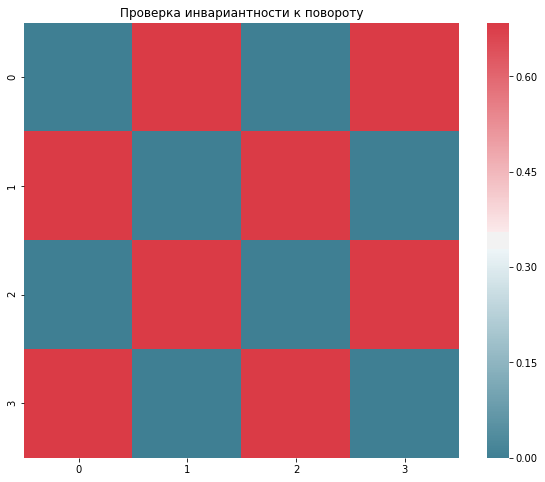

In [11]:
d = [0]*4
plt.figure(figsize=(14,5))
for i in range(4):
    roi = np.rot90(roi)
    d[i] = descriptor(roi)
    plt.subplot(1, 4, i+1)
    plt.imshow(roi, 'gray')
plt.show()
plot_distance_matrix(d, 'Проверка инвариантности к повороту')

__Вывод:__ Дескриптор к повороту не инвариантен, т.к. значения дескриптора меняются при повороте на $90^o$
### Масштабирование
будем производить многократное сжатие

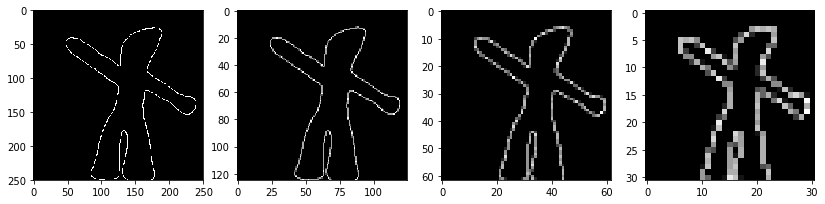

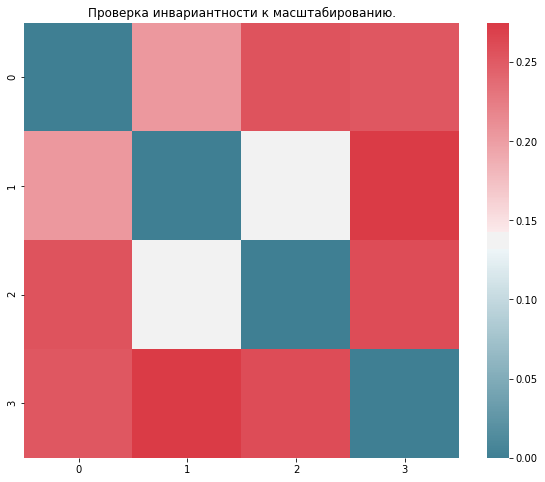

In [12]:
roi = img[500:750, 750:1000]

d = [0]*4
plt.figure(figsize=(14,5))
for step in range(4):
    plt.subplot(1,4,step+1)
    plt.imshow(roi, 'gray')
    d[step] = descriptor(roi)
    roi = small = cv2.resize(roi, (0,0), fx=0.5, fy=0.5) 

plot_distance_matrix(d, 'Проверка инвариантности к масштабированию.')

__Вывод:__ Инвариантности к масштабированию нет